<font color = green >

## Home Task

</font>

Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use albow method to determine the best k for Kmeans

<font color = green >

###  Data 

</font>   

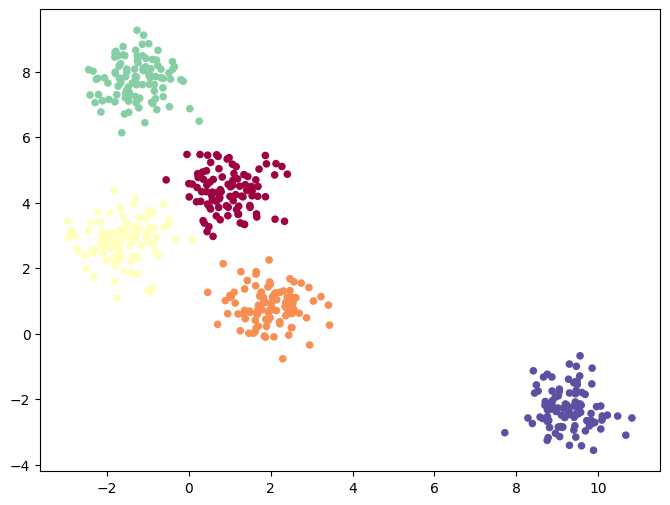

In [109]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

%matplotlib inline

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])

plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)

<n2><b>Implementaiton</b></n2>

In [110]:
class Agglomerative_clustering:
    def __init__(self, n_clusters=1, linkage='single'):
        self.linkage=linkage
        self.points=[]
        self.all_distances={}
        self.n_clusters=n_clusters
    
    def calc_all_distances(self):
        for i in range(len(self.points)):
            for j in range(i + 1):
                key_distance = f"{i}_{j}"
                reverse_key_distance = f"{j}_{i}"
                self.all_distances[key_distance] = self.all_distances[reverse_key_distance] = np.linalg.norm(self.points[i] - self.points[j])
        
        return self.all_distances
    
    def calc_min_distance_of_two_clusters(self,cluster_a, cluster_b):
        if self.linkage=='single':
            return min([self.all_distances['{}_{}'.format(keyword_index_a,keyword_index_b)] for keyword_index_a in cluster_a for keyword_index_b in cluster_b])
        elif self.linkage=='complete':
            return max([self.all_distances['{}_{}'.format(keyword_index_a,keyword_index_b)] for keyword_index_a in cluster_a for keyword_index_b in cluster_b])
        elif self.linkage=='average':
            return sum([self.all_distances['{}_{}'.format(keyword_index_a,keyword_index_b)] for keyword_index_a in cluster_a for keyword_index_b in cluster_b])/len([self.all_distances['{}_{}'.format(keyword_index_a,keyword_index_b)] for keyword_index_a in cluster_a for keyword_index_b in cluster_b])
        elif self.linkage=='ward':
            return sum([d**2 for d in [self.all_distances['{}_{}'.format(keyword_index_a,keyword_index_b)] for keyword_index_a in cluster_a for keyword_index_b in cluster_b]])/len([self.all_distances['{}_{}'.format(keyword_index_a,keyword_index_b)] for keyword_index_a in cluster_a for keyword_index_b in cluster_b])
        else:
            return Exception('ERROR!')
    
    def compute_next_merge(self, clusters):
        labels= list(clusters.keys())
        min_distance = self.calc_min_distance_of_two_clusters(clusters[labels[0]],clusters[labels[1]])
        clusters_to_merge = [labels[0], labels[1]] 
        for i in range (len(labels)-1):
            for j in range(i+1,len(labels)):
                curr_min_distance= self.calc_min_distance_of_two_clusters(clusters[labels[i]],clusters[labels[j]])
                if curr_min_distance < min_distance: 
                    min_distance = curr_min_distance
                    clusters_to_merge = [labels[i],labels[j]]
        return min_distance, clusters_to_merge
    
    def merge_clusters(self, current_clusters,clusters_to_merge):
        current_clusters[clusters_to_merge[0]] += current_clusters[clusters_to_merge[1]] 
        del current_clusters[clusters_to_merge[1]]
        return current_clusters
    
    def run_agglomerative_clustering(self):
        resulted_clusters={i: [i] for i in range(len(self.points))}    
        while len(resulted_clusters)>self.n_clusters:
            min_distance, clusters_to_merge=  self.compute_next_merge(resulted_clusters)        
            
            if (len(resulted_clusters)) % 10 == 0:
                print ('len(clusters)= {:,} distance = {}'.format(len(resulted_clusters), min_distance))
                   
            resulted_clusters= self.merge_clusters(resulted_clusters, clusters_to_merge)
        return resulted_clusters

    def fit(self, points):
        self.points=points
        self.calc_all_distances()
        return self.run_agglomerative_clustering()


<n2><b>Agglomerative clustering using `complete` linkage<b></n2>

In [111]:
ac = Agglomerative_clustering(5, 'complete')
result=ac.fit(X)

len(clusters)= 500 distance = 0.006352393069545862
len(clusters)= 490 distance = 0.022962819364211833
len(clusters)= 480 distance = 0.03885267528188279
len(clusters)= 470 distance = 0.043351851005828765
len(clusters)= 460 distance = 0.04804558167832638
len(clusters)= 450 distance = 0.057772181953295594
len(clusters)= 440 distance = 0.06307942637142751
len(clusters)= 430 distance = 0.07206125352911633
len(clusters)= 420 distance = 0.07775867626367369
len(clusters)= 410 distance = 0.08503217733680343
len(clusters)= 400 distance = 0.09117351326637446
len(clusters)= 390 distance = 0.09683281597476992
len(clusters)= 380 distance = 0.1024705012453015
len(clusters)= 370 distance = 0.10840529828590828
len(clusters)= 360 distance = 0.11342046410933697
len(clusters)= 350 distance = 0.11825105848905647
len(clusters)= 340 distance = 0.1263739396101331
len(clusters)= 330 distance = 0.1364416219945109
len(clusters)= 320 distance = 0.1452490866786814
len(clusters)= 310 distance = 0.159633526274852
le

In [112]:
for k, value in result.items():
    print ('index = {} (len = {:,}) : {}'.format(k, len(value), value[:10] ))   
enumerated= {i: value[1] for i, value in enumerate(result.items())}
predicted= [k for i in range(len(X))     for k, v in enumerated.items()  if i in v ]
print ('\nPredicted cluster indices for points:\n',predicted)

index = 0 (len = 100) : [0, 77, 428, 53, 100, 20, 267, 142, 108, 52]
index = 1 (len = 116) : [1, 447, 6, 405, 12, 436, 348, 187, 241, 83]
index = 3 (len = 84) : [3, 467, 352, 401, 406, 261, 465, 42, 315, 139]
index = 5 (len = 100) : [5, 260, 317, 396, 61, 120, 228, 38, 223, 343]
index = 10 (len = 100) : [10, 141, 246, 262, 128, 242, 58, 182, 368, 91]

Predicted cluster indices for points:
 [0, 1, 1, 2, 1, 3, 1, 3, 0, 0, 4, 2, 1, 4, 2, 3, 2, 3, 1, 2, 0, 3, 2, 2, 0, 4, 0, 0, 4, 2, 0, 1, 1, 4, 1, 0, 0, 3, 3, 3, 4, 3, 2, 2, 1, 1, 3, 1, 0, 4, 1, 3, 0, 0, 3, 1, 3, 3, 4, 2, 0, 3, 0, 1, 1, 4, 1, 4, 1, 1, 1, 0, 1, 3, 1, 1, 0, 0, 2, 0, 2, 4, 1, 1, 3, 0, 3, 1, 1, 2, 2, 4, 4, 2, 3, 0, 0, 2, 4, 1, 0, 4, 4, 0, 4, 1, 3, 0, 0, 1, 1, 2, 0, 3, 3, 4, 4, 4, 0, 3, 3, 1, 1, 4, 2, 1, 3, 2, 4, 4, 4, 0, 1, 3, 4, 3, 3, 3, 1, 2, 0, 4, 0, 2, 0, 3, 3, 4, 0, 1, 1, 4, 4, 0, 1, 1, 1, 1, 4, 2, 4, 3, 2, 1, 0, 0, 2, 0, 3, 0, 2, 1, 3, 3, 0, 4, 2, 4, 1, 4, 1, 4, 4, 3, 2, 3, 0, 1, 4, 3, 4, 0, 3, 1, 0, 2, 1, 3, 4, 4, 0, 4, 

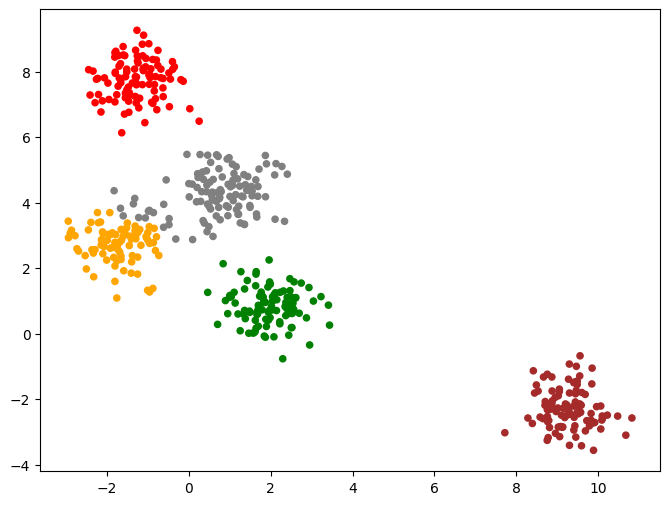

In [113]:
plt.figure(figsize=(8,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'red'])
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s=20)    

<n3><b>Sklearn</b></n3>

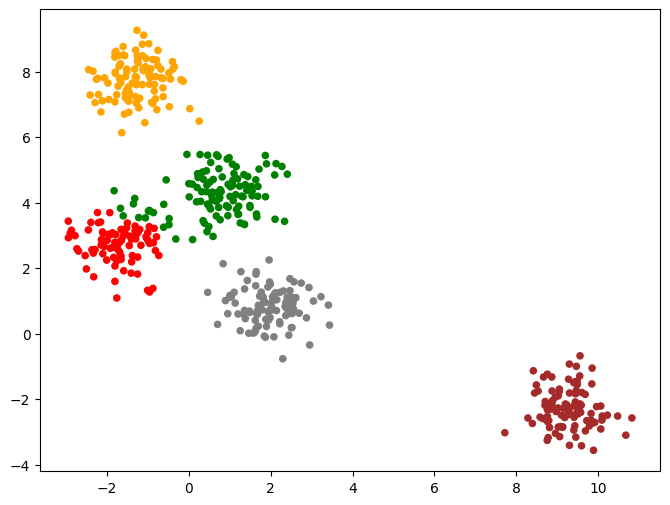

In [114]:
from sklearn.cluster import AgglomerativeClustering
clf = AgglomerativeClustering(n_clusters=5, linkage= 'complete')  # single linkage was not available in sklearn 
# available linkage : {“ward”, “complete”, “average”, “single” ! WRONG ! }, optional (default=”ward”)
predicted = clf.fit_predict(X)
plt.figure(figsize=(8,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'red'])
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s=20) 

<n2><b>Agglomerative clustering using `single` linkage <b></n2>

len(clusters)= 500 distance = 0.006352393069545862
len(clusters)= 490 distance = 0.022962819364211833
len(clusters)= 480 distance = 0.03723317051445359
len(clusters)= 470 distance = 0.04073414603378936
len(clusters)= 460 distance = 0.04466336223562292
len(clusters)= 450 distance = 0.05158223742120575
len(clusters)= 440 distance = 0.05836328021328444
len(clusters)= 430 distance = 0.06307942637142751
len(clusters)= 420 distance = 0.06979926290648931
len(clusters)= 410 distance = 0.07609885544758688
len(clusters)= 400 distance = 0.07958344006635855
len(clusters)= 390 distance = 0.0845375327314368
len(clusters)= 380 distance = 0.08829224898640811
len(clusters)= 370 distance = 0.09138501510669728
len(clusters)= 360 distance = 0.09707178633171046
len(clusters)= 350 distance = 0.10150157844091252
len(clusters)= 340 distance = 0.1038948254934588
len(clusters)= 330 distance = 0.10840529828590828
len(clusters)= 320 distance = 0.11217642549565941
len(clusters)= 310 distance = 0.11658254669979648


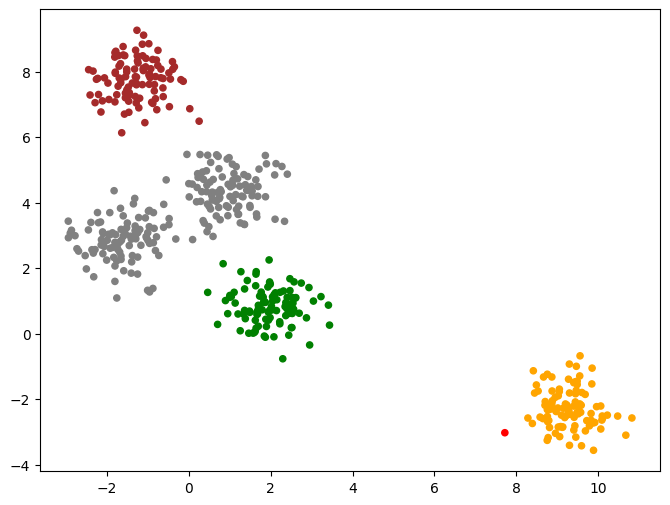

In [115]:
ac = Agglomerative_clustering(5, 'single')
result=ac.fit(X)
for k, value in result.items():
    print ('index = {} (len = {:,}) : {}'.format(k, len(value), value[:10] ))   
enumerated= {i: value[1] for i, value in enumerate(result.items())}
predicted= [k for i in range(len(X))     for k, v in enumerated.items()  if i in v ]
print ('\nPredicted cluster indices for points:\n',predicted)
plt.figure(figsize=(8,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'red'])
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s=20) 

<n3><b>Sklearn</b></n3>

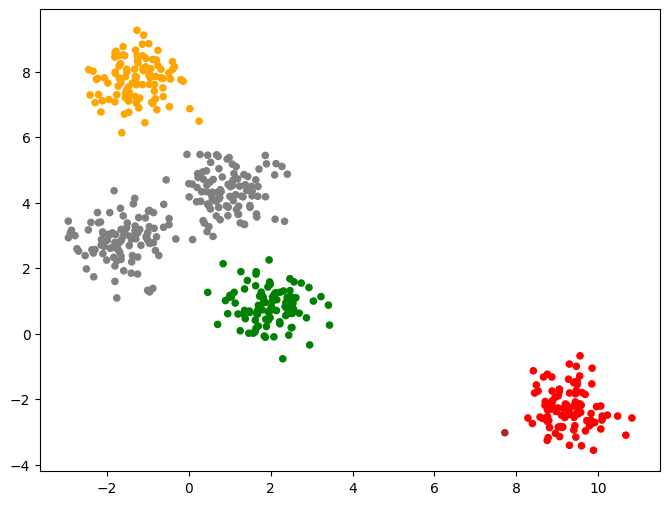

In [116]:
from sklearn.cluster import AgglomerativeClustering
clf = AgglomerativeClustering(n_clusters=5, linkage= 'single')  # single linkage was not available in sklearn 
# available linkage : {“ward”, “complete”, “average”, “single” ! WRONG ! }, optional (default=”ward”)
predicted = clf.fit_predict(X)
plt.figure(figsize=(8,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'red'])
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s=20)

<n2><b>DBSCAN<b></n2>

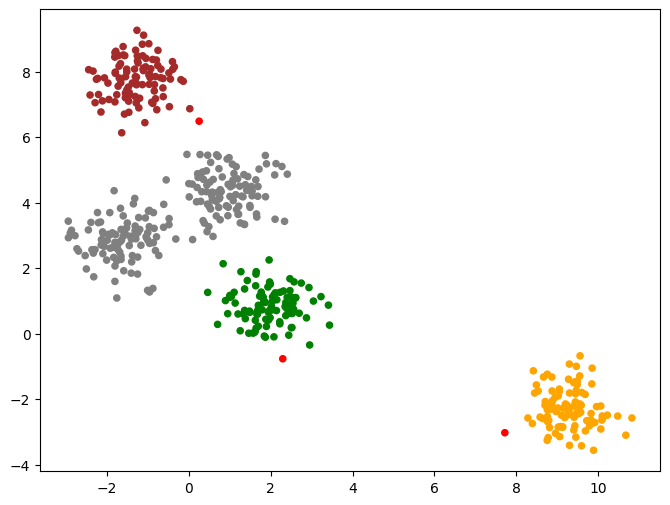

In [117]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5).fit(X)
predicted = dbscan.fit_predict(X)

plt.figure(figsize=(8,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'red'])
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s=20)

<n2><b>Use albow method to determine the best k for Kmeans<b></n2>

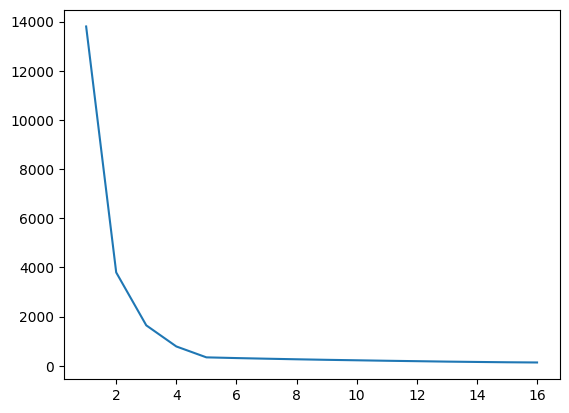

In [118]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
ks=[]

for k in range(1, 17):
    kmeans = KMeans(n_clusters=k, random_state=2024)
    kmeans.fit(X)
    ks.append(kmeans.inertia_)
plt.plot(range(1, 17), ks)

<n3>K=5</n3>

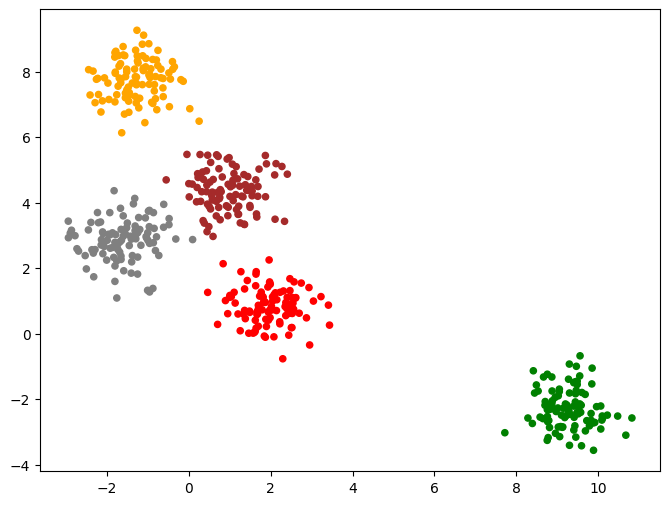

In [119]:
clf = KMeans(n_clusters=5) 
clf.fit(X)
predicted= clf.predict(X)
plt.figure(figsize=(8,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'red'])
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s=20)